In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.age, df.bought_insurance, test_size=0.2)

In [5]:
x_train

22    40
20    21
18    19
1     25
0     22
24    50
26    23
19    18
9     61
21    26
15    55
17    58
23    45
8     62
7     60
3     52
25    54
5     56
4     46
10    18
2     47
Name: age, dtype: int64

In [8]:
reg=LogisticRegression()


In [9]:
x_train.shape

(21,)

In [10]:
x_train=x_train.values.reshape(-1, 1)
x_train.shape

(21, 1)

In [11]:
y_train.shape

(21,)

In [12]:
reg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
search = GridSearchCV(reg, grid_params, cv=5, n_jobs=-1, verbose=1)
search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [15]:
reg.intercept_

array([-7.80321527])

In [16]:
search.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [17]:
reg.coef_

array([[0.20238104]])

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
x_test=x_test.values.reshape(-1, 1)
y_pred=reg.predict(x_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[3 1]
 [1 1]]


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



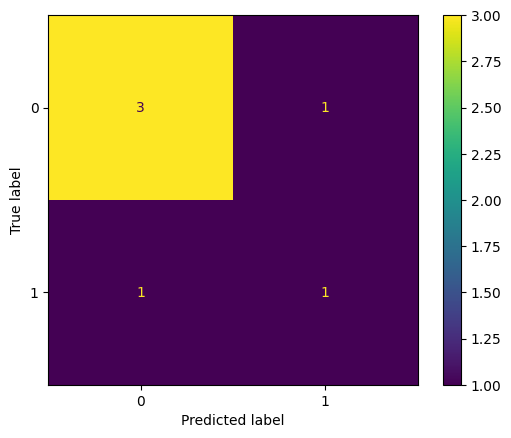

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Classification Report:\n", classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_estimator(search, x_test, y_test))

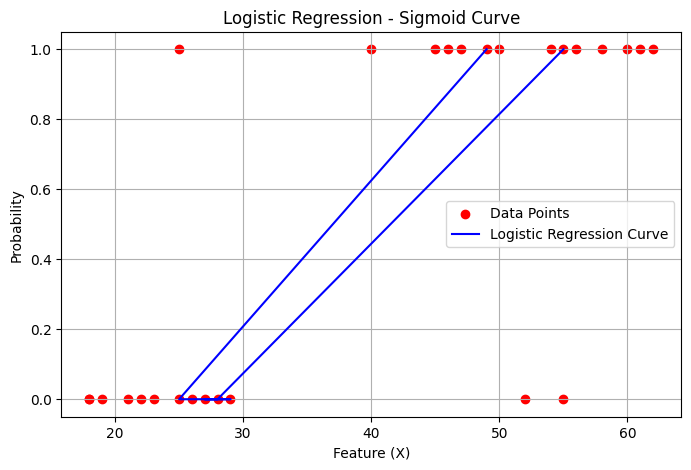

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(df.age, df.bought_insurance, color='red', label='Data Points')
plt.plot(x_test, y_pred, color='blue', label='Logistic Regression Curve')
plt.xlabel("Feature (X)")
plt.ylabel("Probability")
plt.title("Logistic Regression - Sigmoid Curve")
plt.legend()
plt.grid(True)
plt.show()